<a href="https://colab.research.google.com/github/ACRainieri/pyspark/blob/main/Projeto_Python_Analise_de_Dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import urllib.request

with urllib.request.urlopen("https://www.cifraclub.com.br/van-halen/cant-stop-lovin-you/") as url:
  page = url.read()

from bs4 import BeautifulSoup

soup  = BeautifulSoup(page, "html.parser")

print(soup.title.string)
print(soup)

#print(soup.string_container)
#print(soup.find_all('a'))

#tables = soup.find('tables')


Importando dados de pagina Web

In [ ]:
import pandas as pd
import requests 
from bs4 import BeautifulSoup
from tabulate import tabulate

res = requests.get("https://www.nationmaster.com/country-info/stats/Media/Internet-users")

soup = BeautifulSoup(res.content, 'lxml')

#Extrair a tabela html
table = soup.find_all('table')[0]

#Converter a tabela HTML em um framework pandas
df = pd.read_html(str(table))

print(df)


#Convert para formato Json
print(df[0].to_json(orient='records'))

print('\nTabela formatada por pandas/tabulate:\n')
print(tabulate(df[0], headers='keys', tablefmt='psql'))

Pandas - Series

In [ ]:
from pandas import Series
import pandas as pd

a = [1, 7,  5, 77, -4]

myvar = pd.Series(a)

print(myvar)

pd.isnull(myvar)



0     1
1     7
2     5
3    77
4    -4
dtype: int64


0    False
1    False
2    False
3    False
4    False
dtype: bool

Pandas - Dataframe

In [ ]:
from pandas import DataFrame

dict = {'Estado': ['Santa Catarina', 'Paraná', 'Goias', 'Maranhao', 'Piaui'],
        'Ano': [1980, 1990, 2000, 2010, 2020, ],
        'Populacao': [1.1, 1.2, 1.3, 1.4, 2.0]
}

df = DataFrame(dict)

print(df)

type(df)

#Eh possivel definir o nome das colunas
df = DataFrame(dict, columns=['Ano', 'Estado', 'Populacao'])

print(df)




           Estado   Ano  Populacao
0  Santa Catarina  1980        1.1
1          Paraná  1990        1.2
2           Goias  2000        1.3
3        Maranhao  2010        1.4
4           Piaui  2020        2.0
    Ano          Estado  Populacao
0  1980  Santa Catarina        1.1
1  1990          Paraná        1.2
2  2000           Goias        1.3
3  2010        Maranhao        1.4
4  2020           Piaui        2.0


In [ ]:
#Filtrar pelo campo Estado
print(df['Estado'])
print('\n')
print(df.index)
print('\n')

#Listar os dados
df.values

#Faz chamado pelo nome do campo
df.Ano

Preenchendo um campo com dados

In [ ]:
dict = {'Estado': ['Santa Catarina', 'Paraná', 'Goias', 'Maranhao', 'Piaui'],
        'Ano': [1980, 1990, 2000, 2010, 2020, ],
        'Populacao': [1.1, 1.2, 1.3, 1.4, 2.0]
}


#Adicionando o nome de uma coluna
df2 = DataFrame(dict, columns=['Ano', 'Estado', 'Populacao', 'Debito'],
                index =['um', 'dois', 'tres', 'quatro', 'cinco'])



import numpy as np

#Preenchendo coluna com dados
df2['Debito'] = np.arange(5.) #5 é exclusivo

print(df2)


print('\n')

#O metodo describe() retorna uma estatistica do seu Dataframe.
print(df2.describe())


#Como localizar os dados por indice
print('\nComo localizar os dados por indice...')

print(df2.loc['tres'])

Tensor Flow

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd

import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__ + "\n")

hello = tf.constant("Hello Tensor Flow")

print(hello)

2.9.2

tf.Tensor(b'Hello Tensor Flow', shape=(), dtype=string)


Download dos dados

In [ ]:
# Download dos dados
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
dataset_path = keras.utils.get_file("housing.data", "https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data")


# Nomes das colunas
nomes_colunas = ['CRIM',
                 'ZN',
                 'INDUS',
                 'CHAS',
                 'NOX',
                 'RM', 
                 'AGE', 
                 'DIS',
                 'RAD',
                 'TAX',
                 'PTRATION', 
                 'B', 
                 'LSTAT', 
                 'MEDV']


# Carrega os dados
dataset = pd.read_csv(dataset_path, 
                      names = nomes_colunas,
                      na_values = "?", 
                      comment = '\t',
                      sep = " ", 
                      skipinitialspace = True)


# Shape - tamanho das linhas e colunas
print(dataset.shape)
print("\n")

# Visualiza os dados
dataset.head()



(506, 14)




,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATION,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


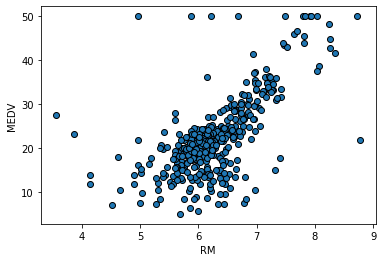

In [ ]:
# Split dos dados
dados_treino = dataset.sample(frac = 0.8, random_state = 0)
dados_teste = dataset.drop(dados_treino.index)

# Representação visual dos dados de treino
fig, ax = plt.subplots()
x = dados_treino['RM']
y = dados_treino['MEDV']
ax.scatter(x, y, edgecolors = (0, 0, 0))
ax.set_xlabel('RM')
ax.set_ylabel('MEDV')
plt.show()